# DATA 550 Lab 2 - EDA on movie data

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the R version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Each partner should complete one file, though collaboration is permitted.</li>
  <li>Push your <code>.ipynb</code> files to GitHub frequently (i.e. not just in one fell swoop at the end).</li>
  <li>Don't forget to submit a clickable link to your GitHub repo on Canvas so we can grade it.</li>
</ul>
</div>

# 0. Get motivated!

I have heard that the movie market is a lucrative business,
and have been looking into starting my own online streaming service
together with a few friends.
Before we do this,
we need to understand the movie market better so that we can get a competitive edge
over existing service.
I have been looking all over for an aspiring data wrangler and future VIZARD,
but haven't been able to track one down.
This is where you come in!

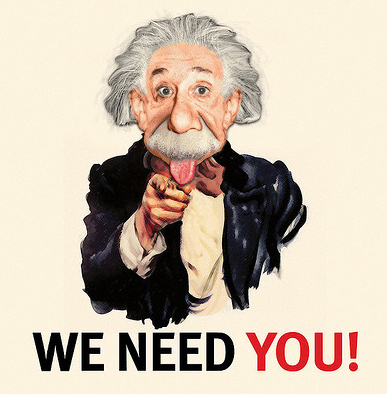

Together,
we must understand the current movie market,
which companies produces what kind of movies,
and which receive good scores.
Then we can have the best movies on our platform and show only those, easy right?
I mean...we will show only good movies, I can't believe no one has thought of this before!
I have already identified a unique name for this service: Bestflix™.

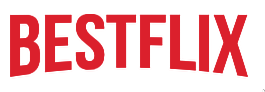

Don't worry,
we're in this together and I will be helping you with the wrangling throughout most exercises
if you take charge of the viz part, deal?.
Also,
I have never failed to start a company before,
so you're in good hands.
I can already smell the `$$$`,
so let's get started!

In this notebook,
we will focus on Exploratory Data Analysis (EDA),
both for single numerical columns, pairwise numerical columns,
numerical columns conditioned on categorical columns and combinations of categorical columns.

# 1. Single numerical columns

<div class="alert alert-success" style="color:black">

### Question 1.1
rubric={reasoning:1,accuracy:1}

<h4>R</h4>
<p>In the beginning of EDA, it can be good to look at some textual summaries, just to get an idea of what to plot. The data file is caled `lab2-movies.json`. Read it in using the sample code below, then do the following in three different cells:</p>
    
<ol>
<li>Display the first few rows of the data.</li>
<li>Display info about all columns, including their data types.</li>
<li>Display a summary description of the data frame's numerical columns only.</li>
</ol>
 
</div>

In [1]:
library(rjson)
library(tidyverse)
library(GGally)
movies <- fromJSON(file = 'lab2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(studios, genres))

theme_set(theme_bw())

# YOUR ANSWER GOES HERE

# Display first 5 rows. 
head(movies)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.3.2     <U+221A> purrr   0.3.4
<U+221A> tibble  3.0.3     <U+221A> dplyr   1.0.2
<U+221A> tidyr   1.1.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'GGally' was built under R version 4.0.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



id,title,runtime,budget,revenue,vote_average,vote_count,genres,studios
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<named list>,<named list>
12,Finding Nemo,100,9.40e+07,940335536,3.86,33887,Animation,Pixar Animation Studios
13,Forrest Gump,142,5.50e+07,677945399,4.05,91921,"Romance, Comedy , Drama",Paramount Pictures
14,American Beauty,122,1.50e+07,356296601,4.13,57879,Drama,DreamWorks SKG
16,Dancer in the Dark,140,1.28e+07,40031879,3.84,4571,Drama,Canal+
22,Pirates of the Caribbean: The Curse of the Black Pearl,143,1.40e+08,655011224,3.81,36337,Action,Walt Disney Pictures
58,Pirates of the Caribbean: Dead Man's Chest,151,2.00e+08,1065659812,3.47,15079,Action,Walt Disney Pictures


In [2]:
# YOUR ANSWER GOES HERE

# column information
str(movies)

tibble [1,008 x 9] (S3: tbl_df/tbl/data.frame)
 $ id          : num [1:1008] 12 13 14 16 22 58 59 70 73 74 ...
 $ title       : chr [1:1008] "Finding Nemo" "Forrest Gump" "American Beauty" "Dancer in the Dark" ...
 $ runtime     : num [1:1008] 100 142 122 140 143 151 96 132 119 116 ...
 $ budget      : num [1:1008] 9.40e+07 5.50e+07 1.50e+07 1.28e+07 1.40e+08 2.00e+08 3.20e+07 3.00e+07 2.00e+07 1.32e+08 ...
 $ revenue     : num [1:1008] 9.40e+08 6.78e+08 3.56e+08 4.00e+07 6.55e+08 ...
 $ vote_average: num [1:1008] 3.86 4.05 4.13 3.84 3.81 3.47 3.63 3.84 4.15 3.13 ...
 $ vote_count  : num [1:1008] 33887 91921 57879 4571 36337 ...
 $ genres      :List of 1008
  ..$ 0   : chr "Animation"
  ..$ 1   : chr [1:3] "Romance" "Comedy" "Drama"
  ..$ 2   : chr "Drama"
  ..$ 3   : chr "Drama"
  ..$ 4   : chr "Action"
  ..$ 5   : chr "Action"
  ..$ 6   : chr "Drama"
  ..$ 7   : chr "Drama"
  ..$ 8   : chr "Drama"
  ..$ 9   : chr "Science Fiction"
  ..$ 10  : chr [1:2] "Romance" "Drama"
  ..$ 11  : c

In [3]:
# YOUR ANSWER GOES HERE

#filter summary results to only numeric columns
summary(Filter(is.numeric,movies))

       id            runtime          budget            revenue         
 Min.   :    12   Min.   : 63.0   Min.   :5.00e+00   Min.   :8.500e+01  
 1st Qu.:  3627   1st Qu.: 96.0   1st Qu.:2.00e+07   1st Qu.:4.128e+07  
 Median : 10432   Median :108.0   Median :4.00e+07   Median :1.019e+08  
 Mean   : 49889   Mean   :112.2   Mean   :5.94e+07   Mean   :1.879e+08  
 3rd Qu.: 44659   3rd Qu.:125.0   3rd Qu.:8.00e+07   3rd Qu.:2.271e+08  
 Max.   :417644   Max.   :202.0   Max.   :3.80e+08   Max.   :2.788e+09  
  vote_average     vote_count   
 Min.   :1.610   Min.   :   11  
 1st Qu.:2.947   1st Qu.:  857  
 Median :3.265   Median : 2688  
 Mean   :3.240   Mean   : 6907  
 3rd Qu.:3.590   3rd Qu.: 8774  
 Max.   :4.430   Max.   :91921  

<div class="alert alert-success" style="color:black">

### Question 1.2
rubric={viz:1,accuracy:1,reasoning:1}

<h4>R</h4>
<ol type="1">
<li><p>Create a single density estimate of a numerical column of your choice by using he density geom.</p></li>
<li><p>Try setting the <code>alpha</code> parameter to a float between 0 and 1 and the <code>fill</code> parameter to a color name as a string to get a shaded density, which I find visually appealing =) Set these inside the geom, not inside the aes function.</p></li>
<li><p>Do you think either of this density plot or the histogram in the previous exercise gives you a better understanding of the underlying data? Which one and why?</p></li>
</ol>


</div>

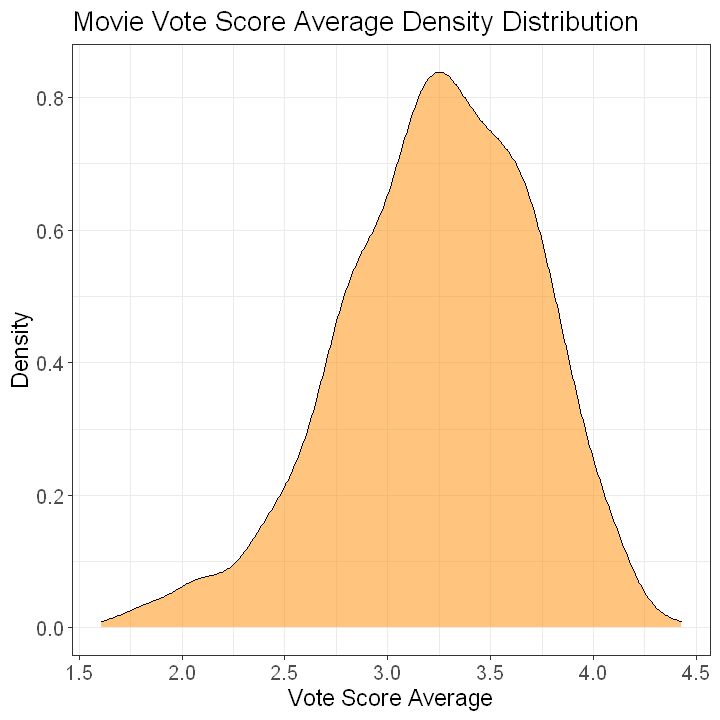

In [4]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=6, repr.plot.height=6)
ggplot(movies) + 
    aes(x = vote_average) + 
    geom_density(alpha=0.5, fill="dark orange") +
    labs(x= "Vote Score Average", y="Density", title= "Movie Vote Score Average Density Distribution") +
    theme(plot.title= element_text(size=16), axis.title= element_text(size=14), axis.text= element_text(size=12))

When comparing a density plot and a histogram, I prefer a density plot because the visual distribution shape of the data is not affected by bin size/the number of bins. In a histogram, if the bin sizes are not choses appropriately, we may see an inaccurate distribution shape of the data in the plot, wheras with the density plot, we are more likely to see the true shape of how the data is distributed.


<div class="alert alert-success" style="color:black">

### Question 1.3
rubric={viz:2,accuracy:2}
    
<h4>R</h4>
<ul>
    <li>Pipe the data fame's numerical columns (except <code>id</code>) into ggplot (the <code>.select_if()</code> method can help here, or you can do it manually).</li>
<li>Copy the code from your density plot above and paste it here. Modify the code so that it accepts the piped dataframe and plots one density estimate per column in a plot grid with 2 columns and 3 rows. Don’t use a loop, use pivoting and faceting instead (example in the lecture videos).</li>
</ul>

</div>

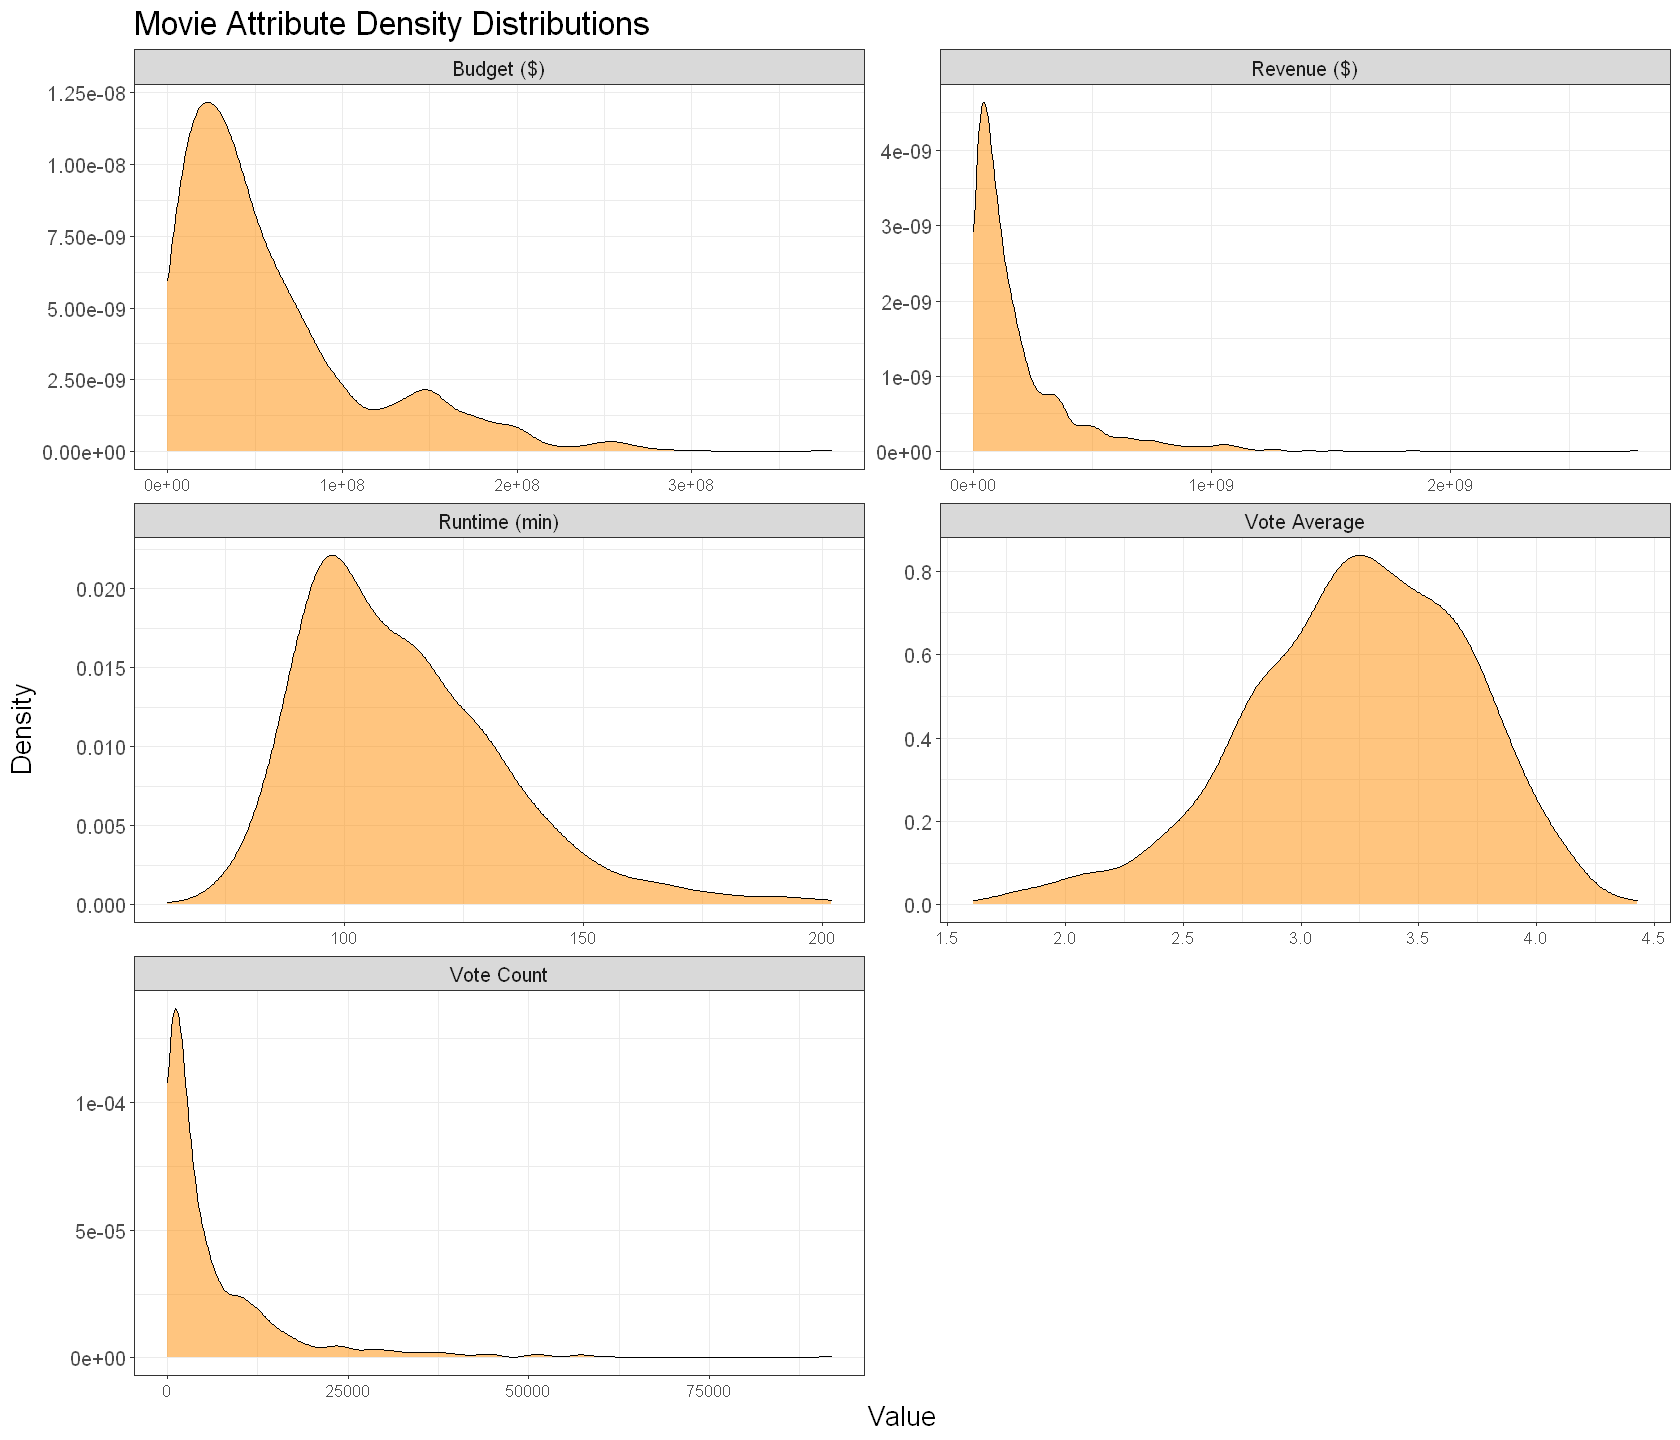

In [5]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=14, repr.plot.height=12)
names <- c(budget = "Budget ($)", revenue = "Revenue ($)", runtime= "Runtime (min)", vote_average = "Vote Average", vote_count= "Vote Count")

movies[-c(1)] %>% 
    select_if(is.numeric) %>%
    pivot_longer(everything()) %>%
    ggplot(aes(x = value)) +  
    geom_density(alpha=0.5, fill="dark orange") +
    facet_wrap(~name, scales="free", nrow=3, ncol=2, labeller = labeller(name=names)) +
    labs(x= "Value", y="Density", title= "Movie Attribute Density Distributions") +
    theme(axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14), axis.text.x= element_text(size=10),
         strip.text.x = element_text(size=12))

# 2. Pairwise numerical columns

<div class="alert alert-success" style="color:black">

### Question 2.1
rubric={viz:1,accuracy:1}
    
<h4>R</h4>

<p>Next, let’s look at the relationships between pairs of numerical columns.For this we will create a scatterplot matrix (SPLOM) for all numerical columns except <code>id</code>.</p>
<p>There is nothing built into <code>ggplot</code> for this but the <code>GGally</code> package has a handy <code>ggpairs</code> function for this, which also plots single column densities on the diagonal and correlation coefficients on the upper corner. Install this package an then use the <code>ggpairs</code>.</p>


</div>

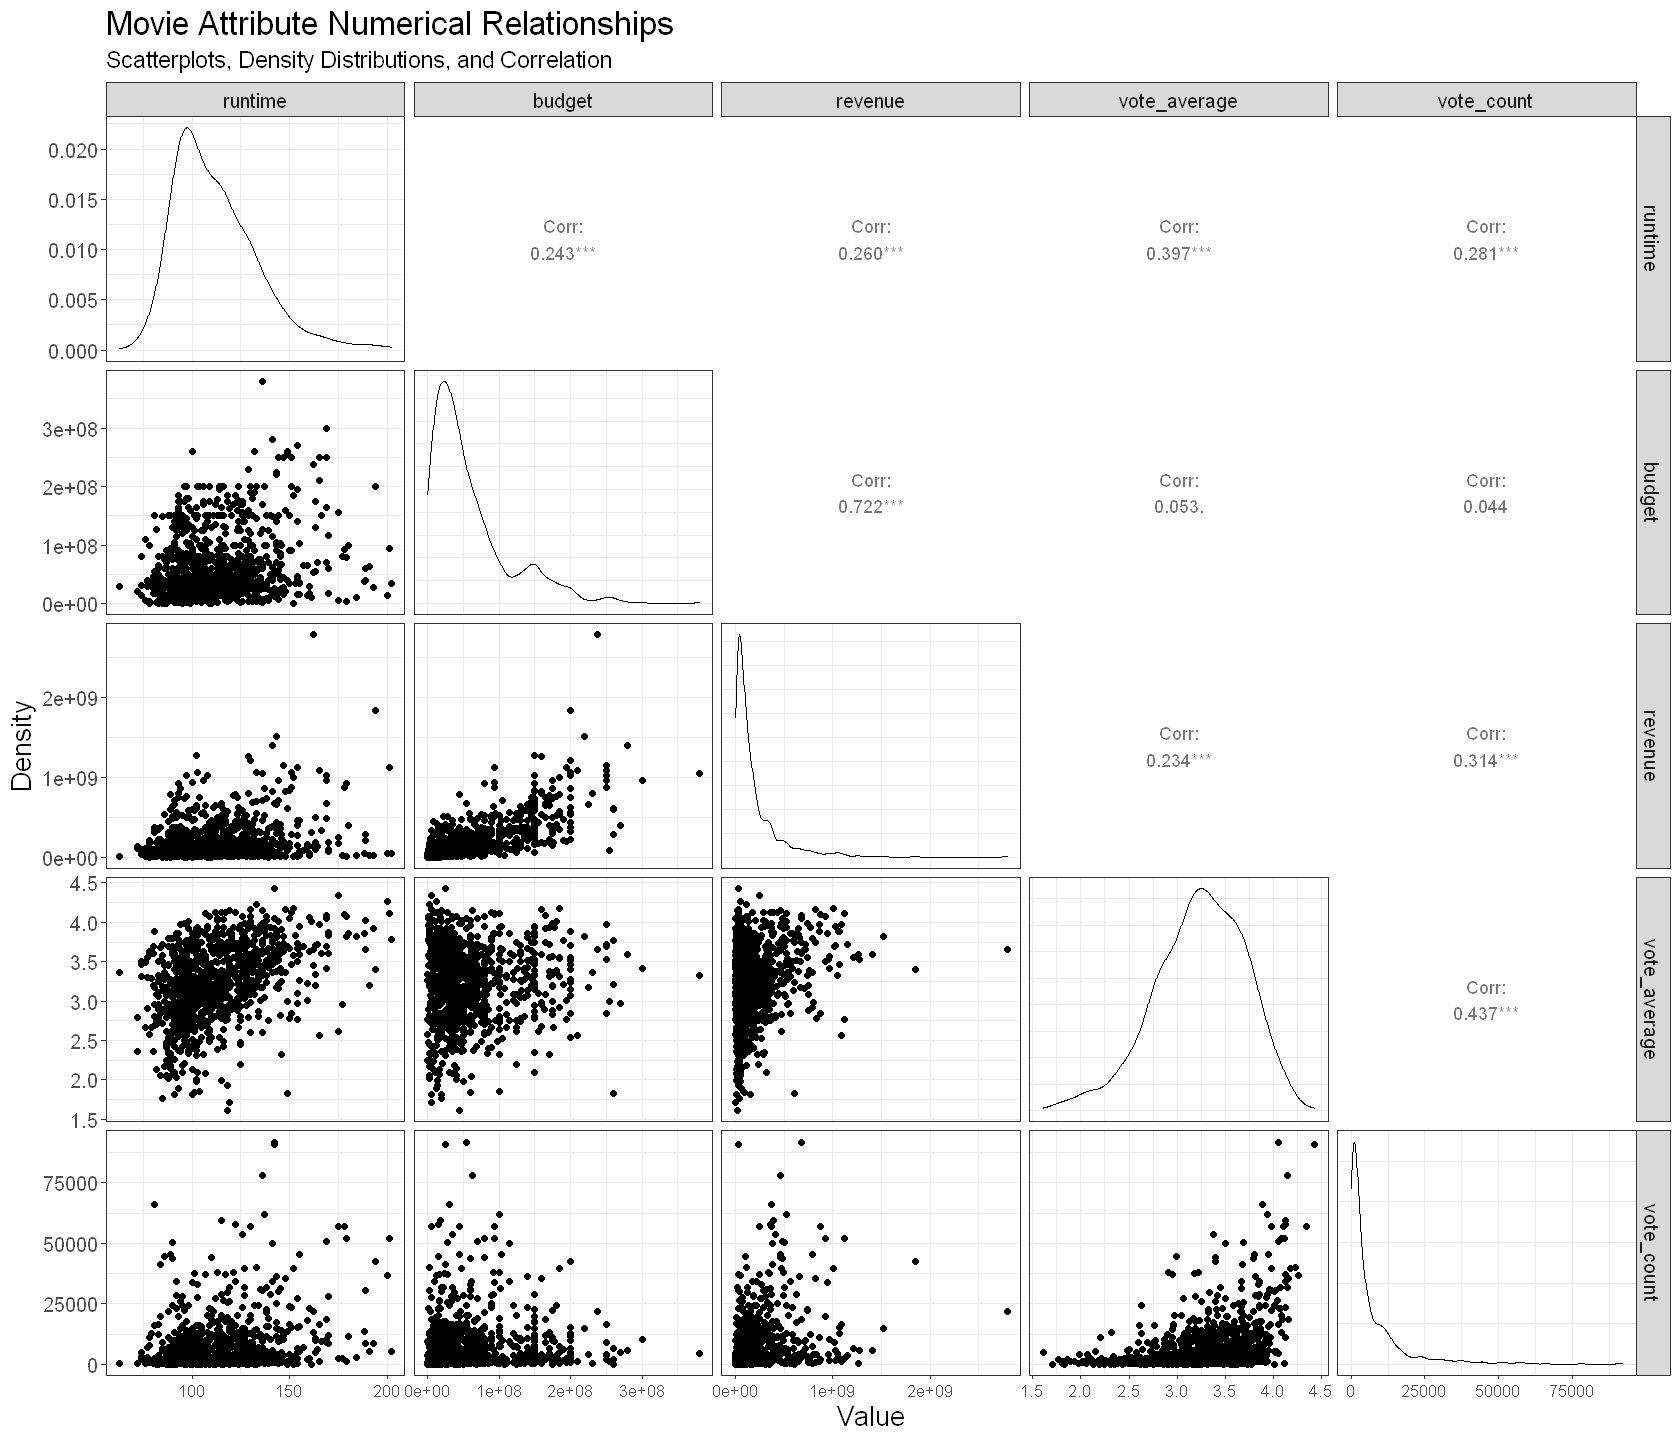

In [6]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=14, repr.plot.height=12)
ggpairs(movies[-c(1)] %>% select_if(is.numeric), progress = FALSE) + 
    labs(x= "Value", y="Density", title= "Movie Attribute Numerical Relationships",
         subtitle= "Scatterplots, Density Distributions, and Correlation") +
    theme(axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14), axis.text.x= element_text(size=10),
         strip.text.x = element_text(size=12), strip.text.y = element_text(size=12))

<div class="alert alert-warning" style="color:black">

### Question 2.2 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
    
<p>We're getting close, dont give up! Remember, we're in it for the <code>$$$</code></p>

<ol type="1">
<li>There is nothing built into <code>ggplot</code> for correlations but the <code>GGally</code> package has a handy <code>ggcorr</code> function we can use. You could also calculate it manually and use <code>geom_tile</code> if you prefer.</li>
<li>Compare this to the plot you made with Altair above. Which visualization do you prefer for viewing the correlation? Briefly explain why in &lt;90 words.</li>
</ol>

</div>

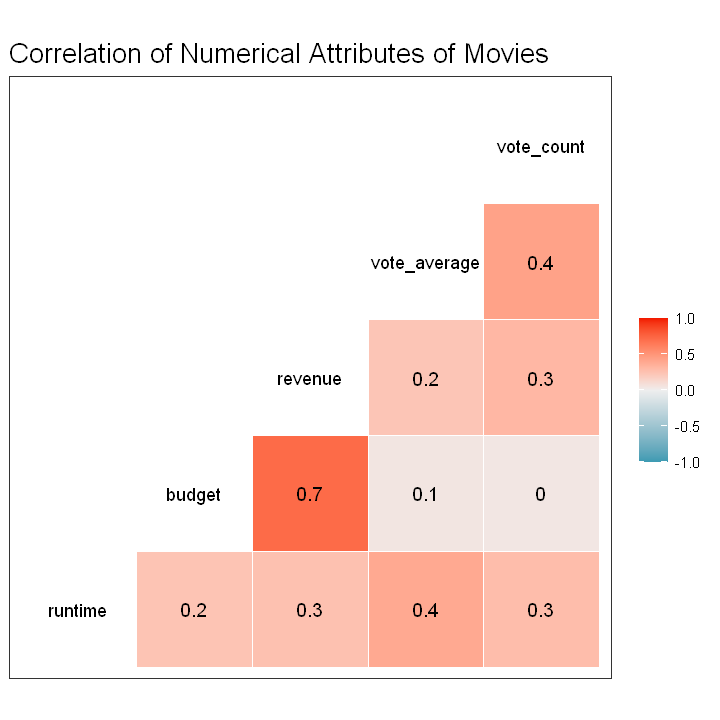

In [7]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=6, repr.plot.height=6)
ggcorr(movies[-c(1)] %>% select_if(is.numeric), label=TRUE)+
    labs(title="Correlation of Numerical Attributes of Movies") + 
    theme(plot.title= element_text(size=16))

I like viewing this plot more than the one in Altair because we do not have the redundant information in the plot (we only have one side of the diagonal). 

# 3. EDA of numerical columns conditioned on a categorical column (genres)

<div class="alert alert-success" style="color:black">

### Question 3.1
rubric={viz:1,accuracy:2}
    
<h4>R</h4>
<p>Let's create a explosion in R. In the tidyverse, exploding a list / vector from a column is referred to as unnesting it, less action-packed but maybe even more descriptive? =)</p>
    
<p>I have already done the necessary wrangling here, but please view the df so that you understand what happened and <a href="https://tidyr.tidyverse.org/reference/nest.html">check out tidyr doc for a simpler example</a>.</p>
    
<ol type="1">
<li>Use this new dataframe and create multiple violinplots inside a single figure by having genres on the y-axis and revenue on the x axis.</li>
<li>Read the documentation of the violin plot to find out how you can use its parameters to add a line for the median (hint: the same as quantile 0.5).</li>
<li>As we did in the previous lecture with <code>add_count()</code>, we need to create a new column for sorting, this time using <code>mutate()</code>. I want you to sort the genres by median revenue, so that the median lines of the violin plots are nicely sorted. I have given you a skeleton below where you can fill in the blanks, but you are also free to do it your own way. Then use the same function as previous lectures to sort by this new column.</li>
</ol>
</div>

In [8]:
free_genres <- movies[-c(1)] %>% unnest(genres)
free_genres <- free_genres %>%
     group_by(genres) %>%
     mutate(median_revenue = median(revenue))
# Display sorted median_revenue column
df <- unique(subset(free_genres[,c("genres", "median_revenue")]))
df[order(-df$median_revenue),]

genres,median_revenue
<chr>,<dbl>
Animation,304320254
Science Fiction,137551594
Action,136982834
Comedy,105834556
Romance,97253287
History,71000000
War,71000000
Drama,70600000
Horror,51465047


## Note:
As seen in the dataframe above, the median revenues have been assigned to the genres, and the violin plots are sorted in the appropriate order. I do not understand why the median line for the `War` genre appears to be too far right on the plot. 

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


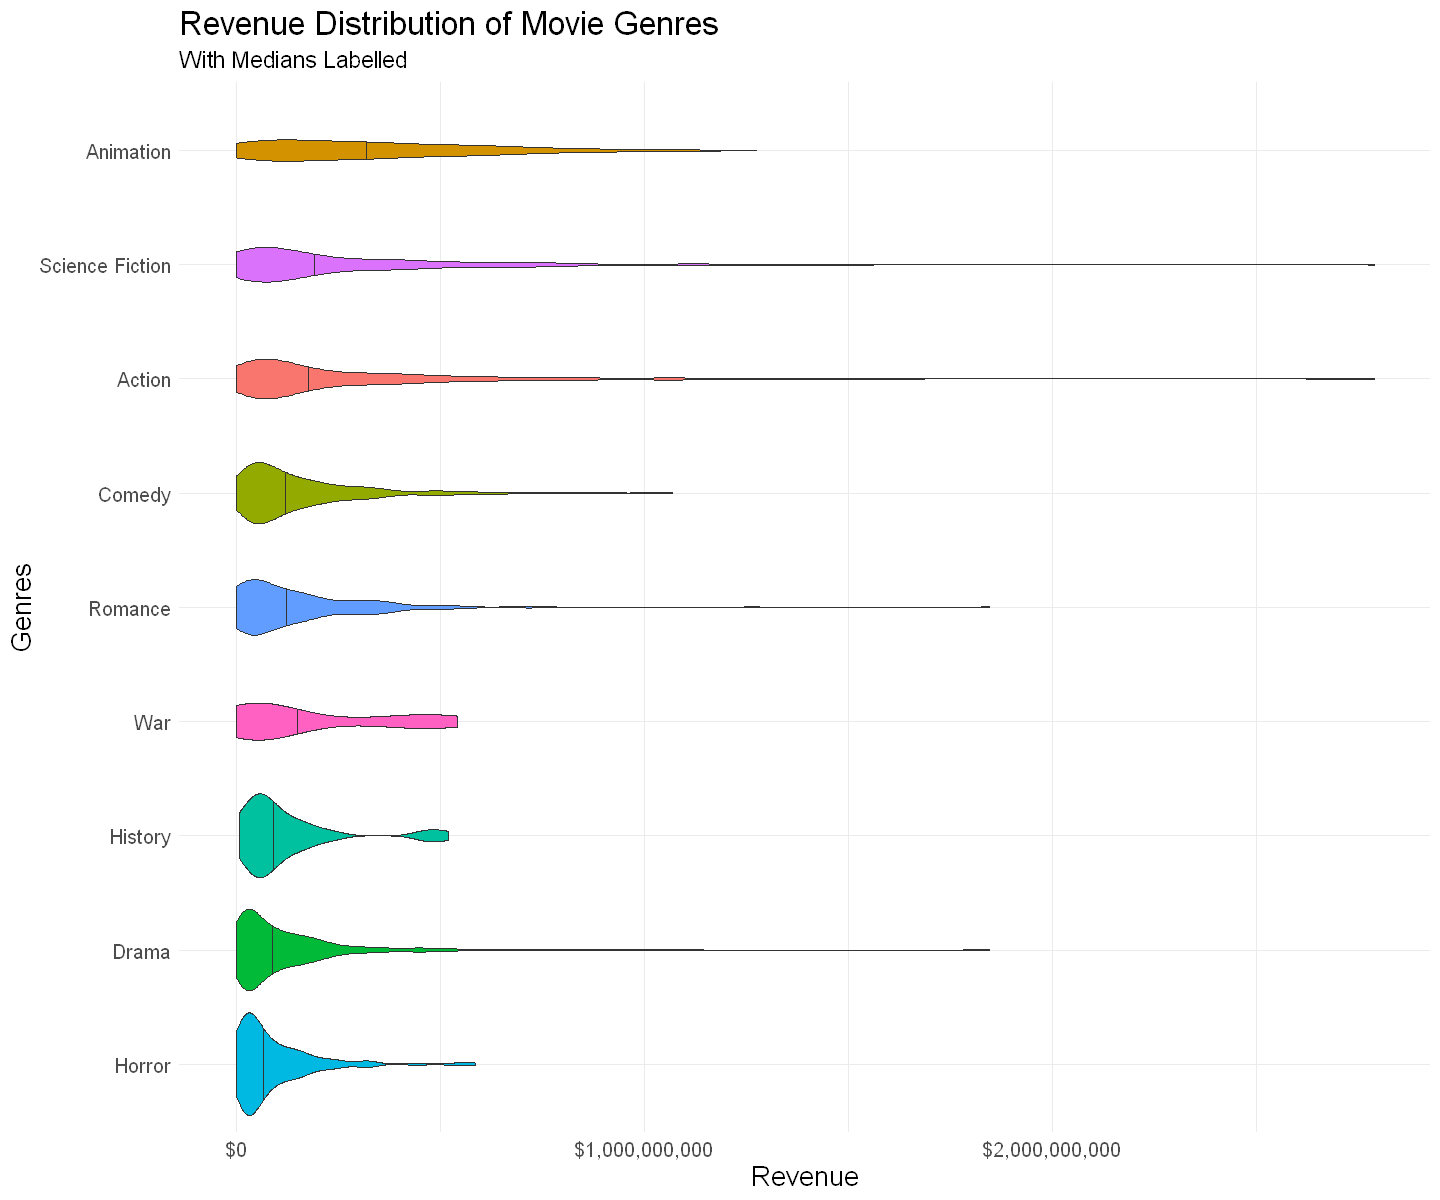

In [9]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(free_genres) +
    aes(x = revenue,
        y = reorder(genres, median_revenue),
        fill = genres) +
    geom_violin(draw_quantiles = 0.5) +
    scale_x_continuous(labels = scales::label_dollar()) +
    labs(x= "Revenue", y="Genres", title= "Revenue Distribution of Movie Genres", subtitle= "With Medians Labelled") +
    theme_minimal() + 
    theme(legend.position='none', axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14))

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={viz:1,accuracy:2}
    
<p>Don't give up soldier, you're almost done with this lab! Bestflix future rests with you.</p>
    
<h4>R</h4>
<ol type="1">
<li>Copy the code from your violinplot above and use the same faceting strategy as for the histograms to repeat this violinplot for all numerical values (you don't need to sort the y-axis by different columns, it is better that categories are sorted by median revenue in all facets so that we don't have to keep track of how they move around between subplots).
<ul>
<li>In contrast to the histograms you will here need to save the genres and medium_income columns by using the <code>!</code> syntax in your call to <code>pivot_longer</code>, see the <a href="https://tidyr.tidyverse.org/reference/pivot_longer.html">example in the manual for how to do this</a>.</li>
<li>You will also need to define both x and y in your <code>aes()</code>, just like in the single violinplot you made above.</li>
</ul></li>
</ol>
 
</div>

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


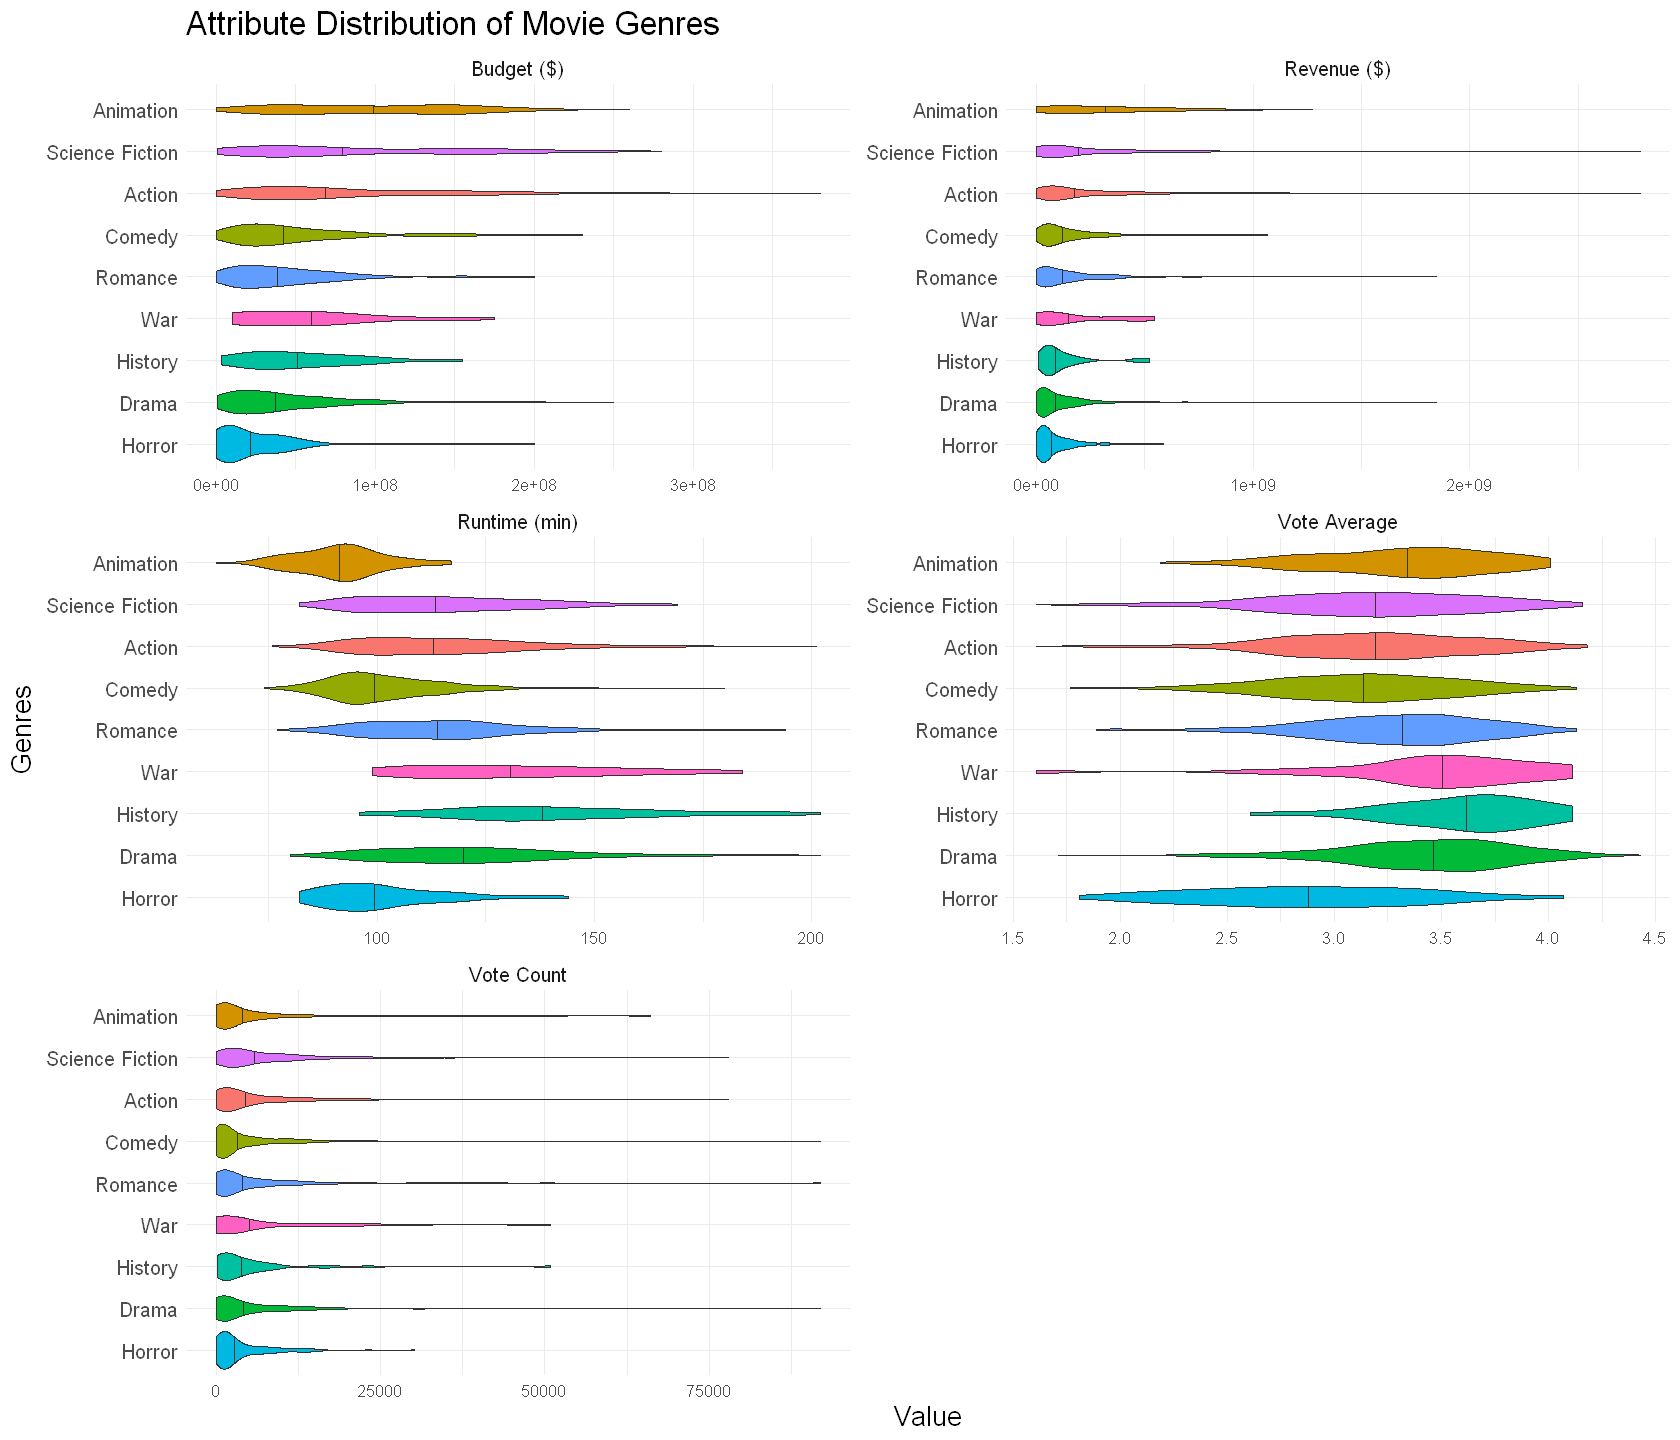

In [10]:
# YOUR ANSWER HERE
options(repr.plot.width=14, repr.plot.height=12)
names <- c(budget = "Budget ($)", revenue = "Revenue ($)", runtime= "Runtime (min)", vote_average = "Vote Average", vote_count= "Vote Count")
free_genres %>%
    select_if(is.numeric) %>%
    pivot_longer(!c(genres, median_revenue), names_to = 'Attribute', values_to= 'Value') %>%
#pivot_longer(!religion, names_to = "income", values_to = "count")
    

ggplot(aes(x = Value,
        y = reorder(genres, median_revenue),
        fill = genres)) +
    geom_violin(draw_quantiles = 0.5) +
    #scale_x_continuous(labels = scales::label_dollar()) +
    labs(x= "Value", y="Genres", title= "Attribute Distribution of Movie Genres") +
    theme_minimal() + 
    facet_wrap(~Attribute, nrow=3, ncol=2, scales="free", labeller = labeller(Attribute=names)) +
    theme(legend.position='none', axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14), axis.text.x= element_text(size=10),
         strip.text.x = element_text(size=12))


<div class="alert alert-warning" style="color:black">

### Question 3.3 (Optional)
rubric={accuracy:0.5,reasoning:0.5}
    
<h4>R</h4>
<ol type="1">
<li>Copy over the code from the faceted violinplots above.</li>
<li>In contrast to boxplots, violinplots can show an indication of counts by scaling their area based on the number of observations instead of keeping it the same in all violins. Read the violin plot documentation and find the variable that controls the scaling of the area and change it so that the violins indicate the count of the observations.</li>
<li>Compare this to the approach we used in Altair for a boxplot + a barplot for counts, which approach do you think is clearer for getting a feeling for the number of observation in each group and why?</li>
</ol>

</div>

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


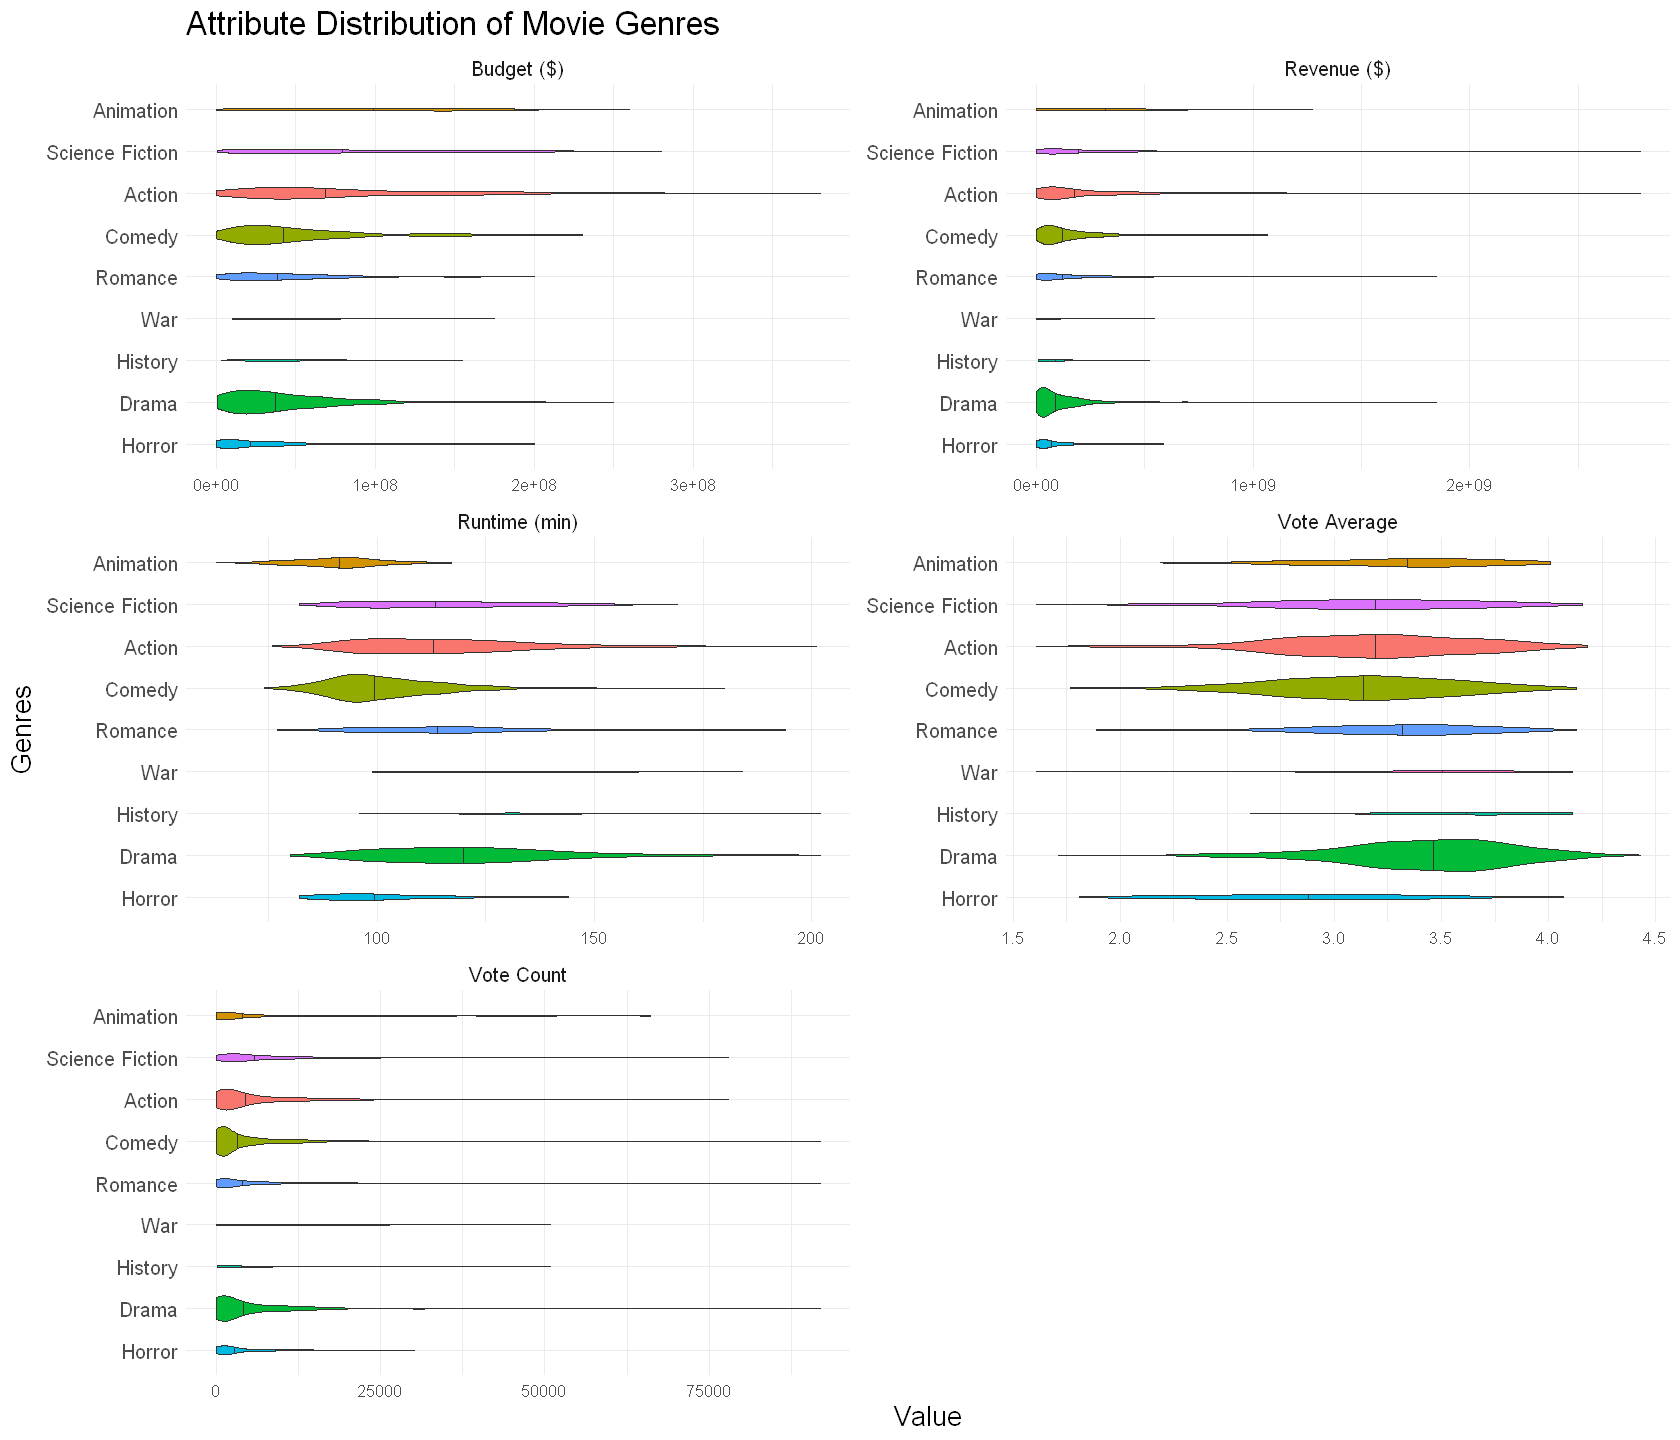

In [11]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=14, repr.plot.height=12)
names <- c(budget = "Budget ($)", revenue = "Revenue ($)", runtime= "Runtime (min)", vote_average = "Vote Average", vote_count= "Vote Count")
free_genres %>%
    select_if(is.numeric) %>%
    pivot_longer(!c(genres, median_revenue), names_to = 'Attribute', values_to= 'Value') %>%
#pivot_longer(!religion, names_to = "income", values_to = "count")
    

ggplot(aes(x = Value,
        y = reorder(genres, median_revenue),
        fill = genres)) +
    geom_violin(draw_quantiles = 0.5, scale= "count") +
    #scale_x_continuous(labels = scales::label_dollar()) +
    labs(x= "Value", y="Genres", title= "Attribute Distribution of Movie Genres") +
    theme_minimal() + 
    facet_wrap(~Attribute, nrow=3, ncol=2, scales="free", labeller = labeller(Attribute=names)) +
    theme(legend.position='none', axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14), axis.text.x= element_text(size=10),
         strip.text.x = element_text(size=12))

A bar plot would be better for getting a feel for the counts because bar plots are easier for us to compare values to one another since lengths of a rectangle is all we are comparing. Comparing/calculating the areas of irregular shapes as seen in the violin is difficult for humans.  

<div class="alert alert-warning" style="color:black">

### Question 3.4 (Optional)
rubric={accuracy:0.5,reasoning:0.5}

<h4>R</h4>
<p>Let’s see how the numerical columns vary with different production studios.</p>
<ol type="1">
<li>Create a new dataframe from exploding/unnesting the <code>studios</code> column in the <code>movies</code> dataframe. You can use my code from above to guide you.</li>
<li>Create a similar sorting list as before, but this time with the studies sorted by median revenue.</li>
<li>Create the same repeated boxplots for the studios. A tip when you are creating similar plots for two different sections of your notebook, is to use a different color for each so that it is easy to orient yourself (unless you are encoding color as a visual aesthetic of course, but we’re not doing that here). Pick any HTML color either via its hex code or by choosing a name from <a href="https://stackoverflow.com/a/37232759/2166823">this list of named colors</a>. Color all the bars and boxes in this color by setting it inside <code>mark_boxplot()</code> / <code>geom_boxplot()</code>.</li>
<li>Create the same barplot of counts as above for the studios. Color the bars in the same colors as the boxplots.</li>
<li>Reflect on the information in the boxplot and / or the barplot. Identify two interesting relationships / questions / discoveries that stand out to you and that you would want to explore further. Briefly motivate why (&lt;90 words).</li>
</ol>

</div>

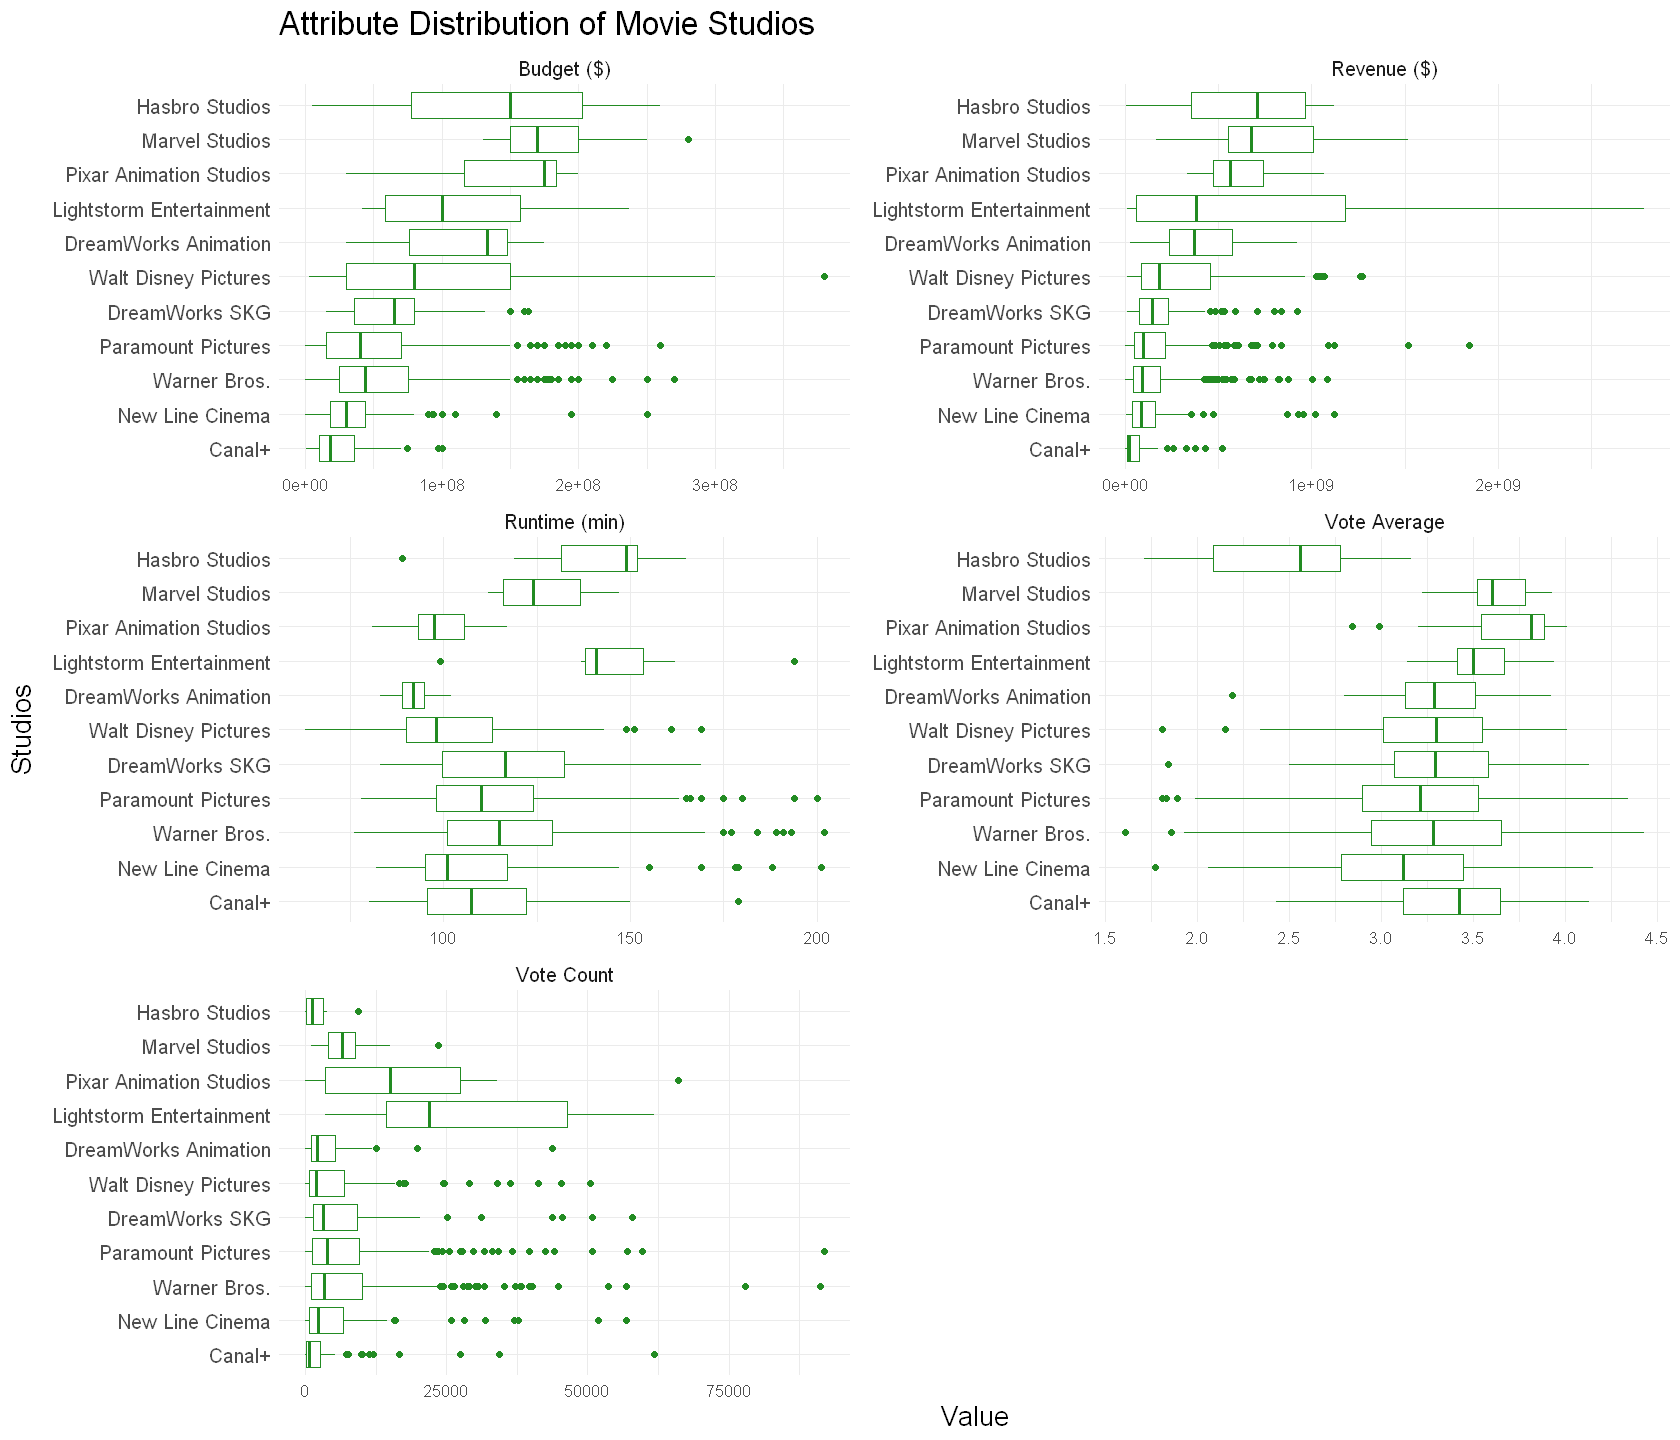

In [17]:
# YOUR ANSWER GOES HERE FOR THE REPEATED BOXPLOT
free_studios <- movies[-c(1)] %>% unnest(studios)
free_studios <- free_studios %>%
     group_by(studios) %>%
     mutate(median_revenue = median(revenue))

options(repr.plot.width=14, repr.plot.height=12)
names <- c(budget = "Budget ($)", revenue = "Revenue ($)", runtime= "Runtime (min)", vote_average = "Vote Average", vote_count= "Vote Count")
free_studios %>%
    select_if(is.numeric) %>%
    pivot_longer(!c(studios, median_revenue), names_to = 'Attribute', values_to= 'Value') %>%
    

ggplot(aes(x = Value,
        y = reorder(studios, median_revenue))) +
    geom_boxplot(color='forest green') +
    labs(x= "Value", y="Studios", title= "Attribute Distribution of Movie Studios") +
    theme_minimal() + 
    facet_wrap(~Attribute, nrow=3, ncol=2, scales="free", labeller = labeller(Attribute=names)) +
    theme(legend.position='none', axis.title= element_text(size=16),
         axis.text= element_text(size=12), plot.title= element_text(size=20),
         plot.subtitle= element_text(size=14), axis.text.x= element_text(size=10),
         strip.text.x = element_text(size=12))

# 4. EDA of categorical columns

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={viz:1,accuracy:1}
    
<ol type="1">
<li>Go through the <a href="http://ggobi.github.io/ggally/articles/ggally_plots.html">GGally example plots</a> and find a plot that you think is suitable for showing the count of the combination of categorical variables. Use this plot to visualize the counts.</li>
<li>Create another plot of the counts by first using <code>add_count()</code> to add a count for all the combinations of genres and studios. This column will be called <code>n</code> and you can map it to an appropriate aesthetics encoding and visualize the results with <code>geom_tile</code> to create a heatmap of counts.</li>
</ol>
    
</div>

Warning message in chisq.test(xtabs(weight ~ y + x, data = data)):
"Chi-squared approximation may be incorrect"


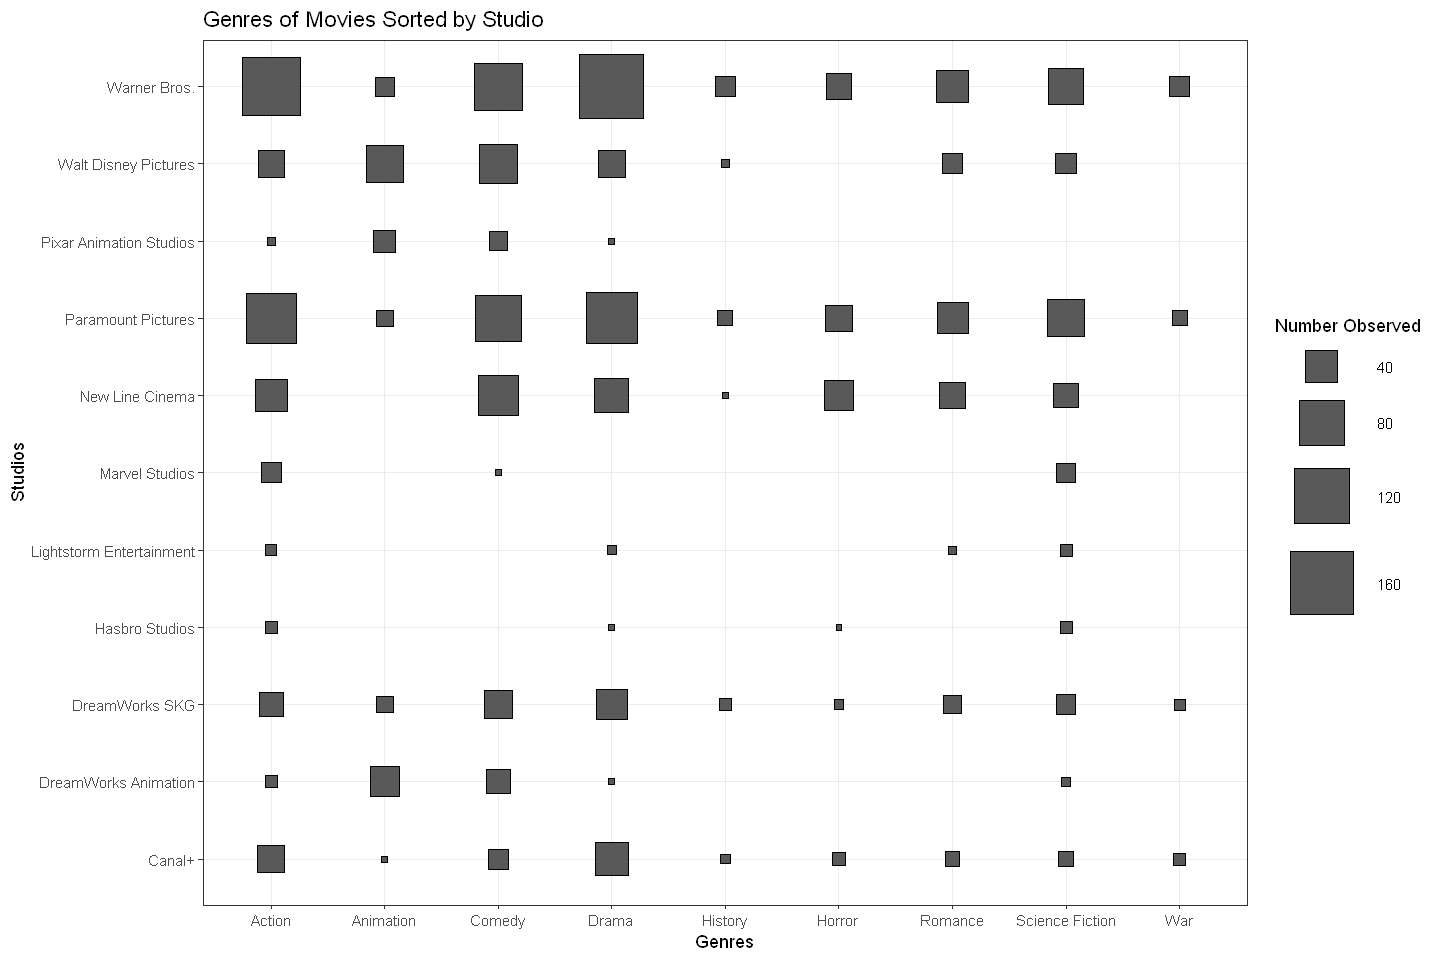

In [14]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=12, repr.plot.height=8)
free_both <- free_genres %>% unnest(studios)
GGally::ggally_cross(free_both, aes(x = genres, y = studios))+
labs(x= "Genres", y="Studios", title= "Genres of Movies Sorted by Studio", size= "Number Observed")


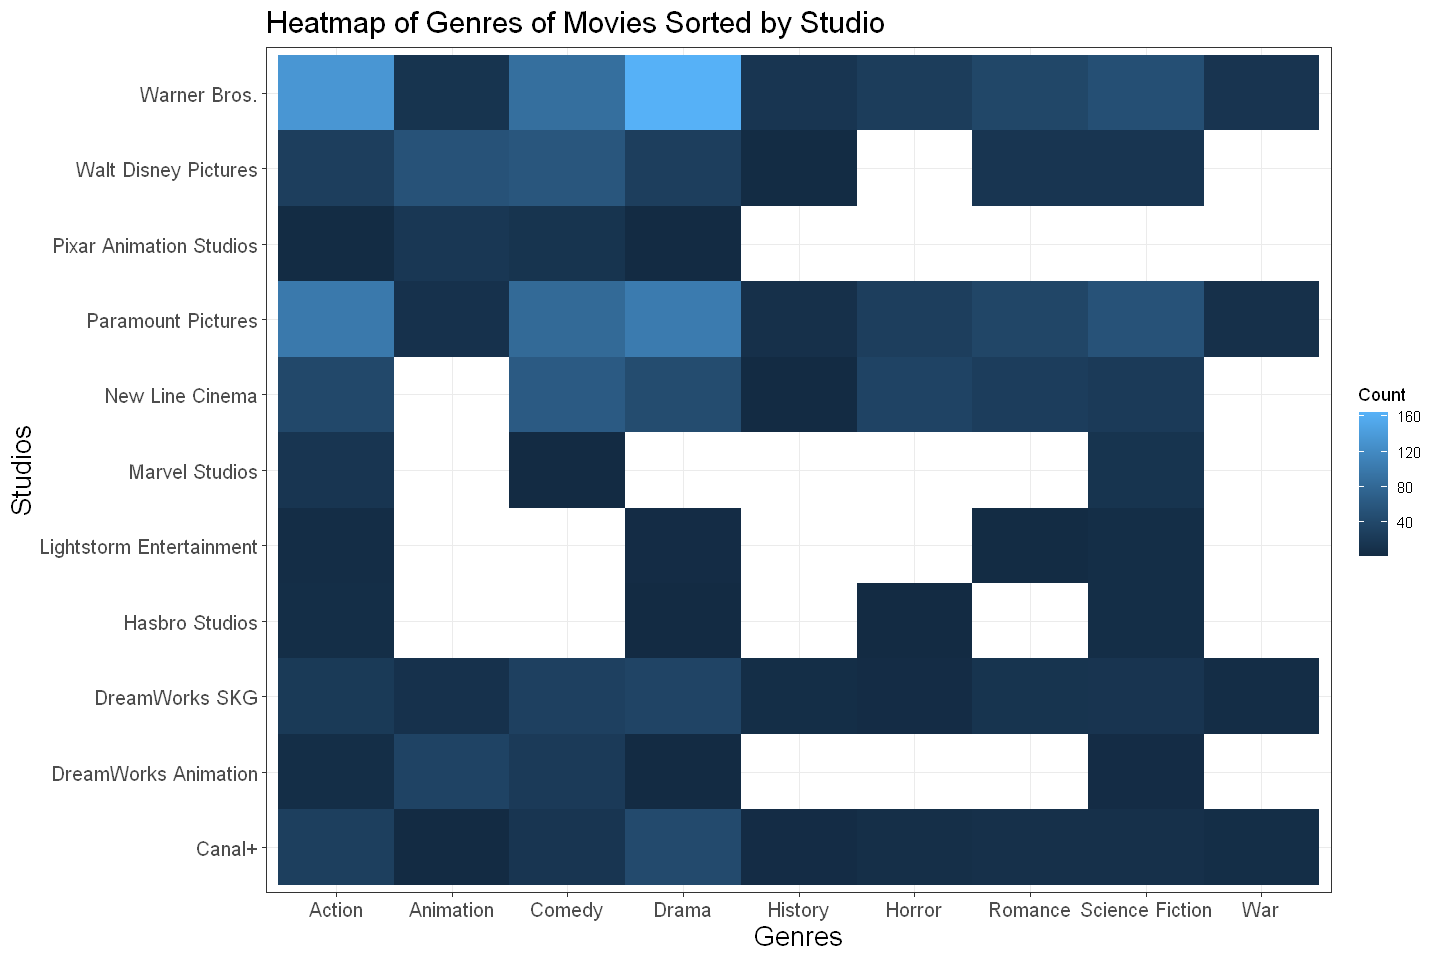

In [15]:
# YOUR ANSWER GOES HERE
options(repr.plot.width=12, repr.plot.height=8)
last <- add_count(free_both, studios)
ggplot(last, aes(x= genres, y= studios, fill=n)) +
    geom_tile() + 
    labs(x= "Genres", y="Studios", title= "Heatmap of Genres of Movies Sorted by Studio", fill="Count") +
    theme(plot.title= element_text(size=18), axis.title= element_text(size=16), axis.text= element_text(size=12))

<div class="alert alert-warning" style="color:black">

### Question 4.2 (Optional)
rubric={accuracy:1}

<h4>R</h4>
<p>
The plots above are great for comparing absolute counts,
but that means that studios with smaller production volume gets drowned out.
Let's instead visualize the proportion within each studio for each genre.
Calculate the proportion for each studio - genre pair,
so that for each studio, the genre proportions adds up to 1.
Visualize with your favorite categorical count plot.
</p>
</div>

`mutate_if()` ignored the following grouping variables:
Column `genres`



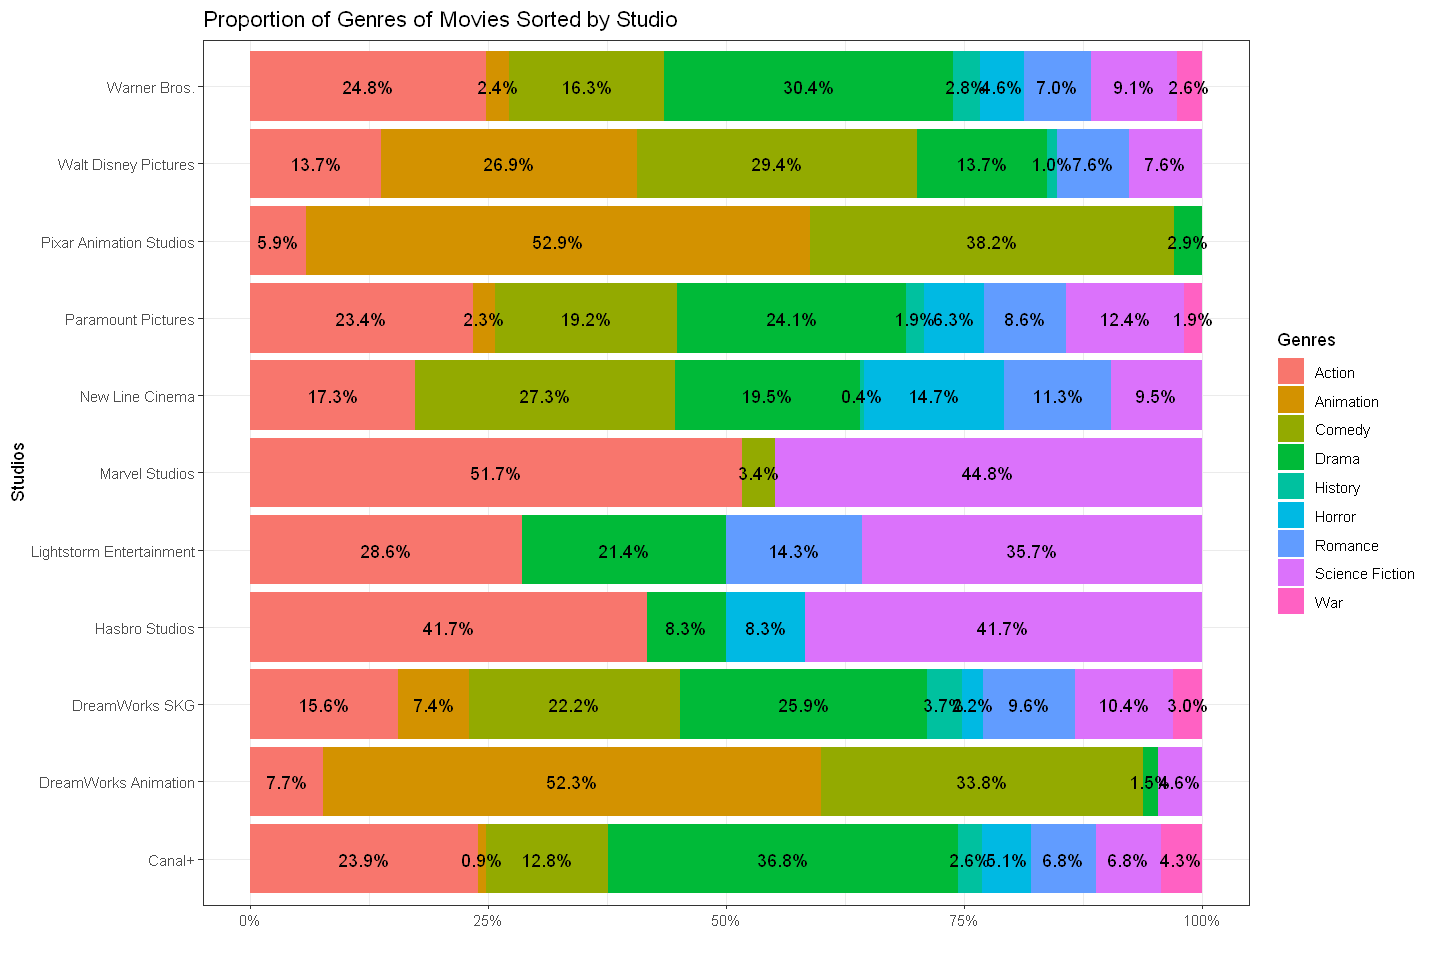

In [16]:
# YOUR ANSWER GOES HERE
free_both <- free_genres %>% unnest(studios) %>%
mutate_if(is.character,as.factor)

GGally::ggally_rowbar(free_both, aes(x = genres, y = studios))+
labs(x= "Studios", title= "Proportion of Genres of Movies Sorted by Studio", fill="Genres")

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).